<a href="https://colab.research.google.com/github/Yeon098/2025_1_Data_analysis/blob/main/%EA%B9%80%EB%8F%84%EC%97%B0/WineQT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 및 데이터 불러오기

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#EDA 및 전처리

##데이터 확인

In [114]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

* fixed acidity: 고정 산도
* volatile acidity: 휘발성 산도
* citric acid: 구연산
* residual sugar: 잔여 당분
* chlorides: 염소화물
* free sulfur dioxide: 유리 이산화황
* total sulfur dioxide: 총 이산화황
* density: 밀도
* pH: 산성 또는 염기성 정도
* sulphates: 황산염
* alcohol: 알코올 함량
* quality: 품질
* Id: 식별 고유값

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [116]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


품질 범위: 3~8점

##변수 변환

In [117]:
df = df.drop(['Id'], axis=1)

##특성간 상관관계 시각화

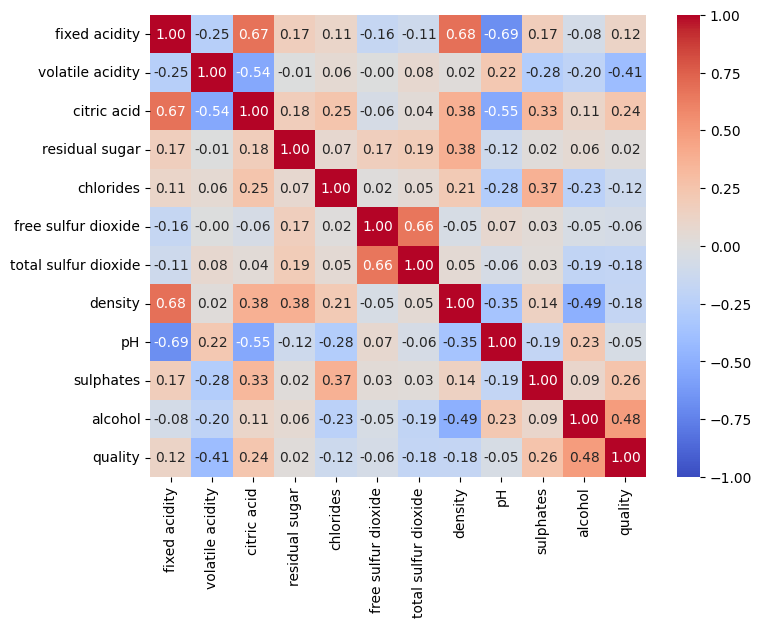

In [118]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

##데이터 분할

In [119]:
X = df.drop(columns=["quality"])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

##표준화 스케일링

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#선형 회귀 모델

In [121]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))

#로지스틱 회귀 모델

In [122]:
logistic_params = {"C": [0.01, 0.1, 1, 10], "max_iter": [500, 1000, 2000]}
logistic_model = GridSearchCV(LogisticRegression(), logistic_params, cv=5, scoring="accuracy")
logistic_model.fit(X_train_scaled, y_train)
logistic_best_model = logistic_model.best_estimator_
logistic_pred = logistic_best_model.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

#결정 트리 모델

In [123]:
tree_params = {"max_depth": [3, 5, 10], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 5]}
tree_model = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring="accuracy")
tree_model.fit(X_train_scaled, y_train)
tree_best_model = tree_model.best_estimator_
tree_pred = tree_best_model.predict(X_test_scaled)
tree_accuracy = accuracy_score(y_test, tree_pred)

#결과 평가

##모델 성능 평가

In [124]:
print(f"Linear Regression RMSE: {linear_rmse:.2f}")
print(f"Best Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Best Decision Tree Accuracy: {tree_accuracy:.2f}")
print(f"Best Logistic Regression Parameters: {logistic_model.best_params_}")
print(f"Best Decision Tree Parameters: {tree_model.best_params_}")

Linear Regression RMSE: 0.63
Best Logistic Regression Accuracy: 0.64
Best Decision Tree Accuracy: 0.58
Best Logistic Regression Parameters: {'C': 10, 'max_iter': 500}
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


선형 회귀 (Linear Regression)
- RMSE: 0.63 → 모델의 평균 오차를 나타내며, 낮을수록 좋음.
- 회귀 모델은 와인 품질 예측에 적절하지 않을 가능성이 높음 (분류 문제이므로 정확도 평가가 더 유용).
---
로지스틱 회귀 (Logistic Regression)
- 정확도: 0.64 → 분류 모델로서 상대적으로 좋은 성능을 보임.
- 최적의 하이퍼파라미터 (C=10, max_iter=500)로 튜닝되어 성능이 향상됨.
- 일반화 성능이 안정적이며, 복잡도가 낮아 해석 가능성이 높음.
---
결정 트리 (Decision Tree)
- 정확도: 0.58 → 로지스틱 회귀보다 낮은 성능을 보임.
- 최적 하이퍼파라미터 (max_depth=10, min_samples_leaf=1, min_samples_split=2)로 튜닝되었음.
- 과적합 가능성이 존재 → 추가적인 가지치기(pruning)나 랜덤 포레스트와 같은 앙상블 기법 활용 필요.

##추가 개선 사항

- 앙상블 기법 활용: 랜덤 포레스트(Random Forest)나 XGBoost를 활용하면 결정 트리의 단점을 보완하면서 예측 성능을 높일 수 있음.
- 데이터 불균형 처리: 와인 품질 데이터가 특정 값에 집중될 가능성이 있으므로 오버샘플링(oversampling) 또는 언더샘플링(undersampling) 적용 필요.
- 특성 엔지니어링(Feature Engineering) 추가 검토: 품질 예측에 기여도가 낮은 변수를 제거하고, 새로운 파생 변수(feature) 생성 가능.
- 모델 평가 방식 확장: F1 Score, Precision, Recall 등의 추가적인 성능 평가 지표 활용 권장.